In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
dataset = pd.read_csv(r"E:\Programming\Machine Learning\Data Preprocessing\health_care.csv")
dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
dataset.shape

(110527, 14)

In [4]:
dataset.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#modifying the date and time into standard form
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay']).dt.date.astype('datetime64[ns]')
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [8]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


for the schedule day and appointment day storing the weekdays only into a variable

In [9]:
# 5 is Saturday, 6 is Sunday 
dataset['sch_weekday'] = dataset['ScheduledDay'].dt.dayofweek

In [10]:
dataset['app_weekday'] = dataset['AppointmentDay'].dt.dayofweek

In [11]:
dataset['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [12]:
dataset['app_weekday'].value_counts()

app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [13]:
dataset.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [15]:
#changing the name of some cloumns
dataset= dataset.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [16]:
dataset.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [18]:
# dropping some columns which have no significance
dataset.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [19]:
dataset

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [21]:
dataset.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


Text(0.5, 1.02, 'Count of target variable per category')

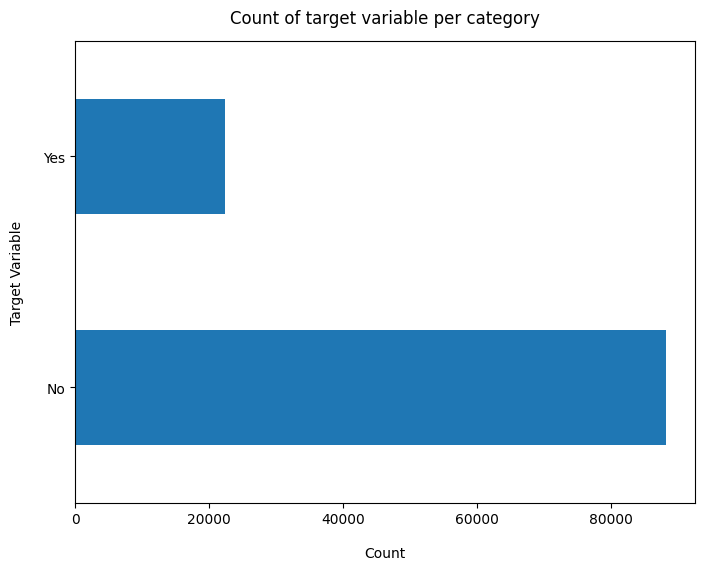

In [23]:
dataset['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Target Variable', labelpad=14)
plt.title('Count of target variable per category', y=1.02)

In [24]:
# calculating the % of appointments or not 
100 * dataset['NoShow'].value_counts()/len(dataset['NoShow'])

NoShow
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [25]:
dataset['NoShow'].value_counts()

NoShow
No     88208
Yes    22319
Name: count, dtype: int64

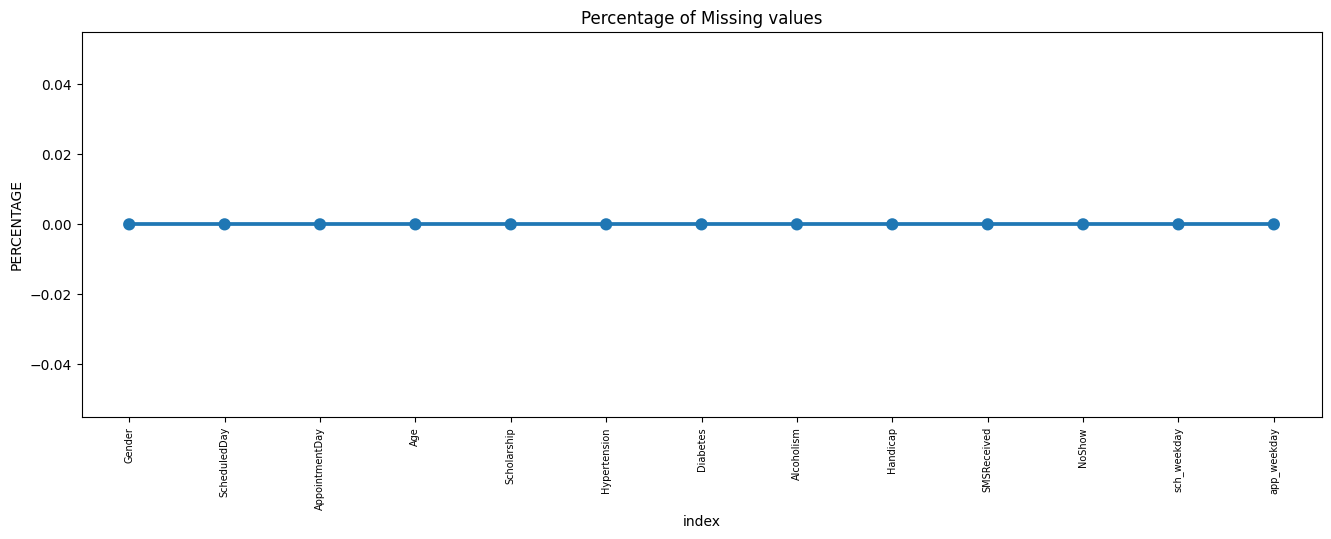

In [32]:
# Having a look that data contains missing values or not
missing = pd.DataFrame((dataset.isnull().sum()) * 100 / dataset.shape[0]).reset_index()

# Create a plot
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Data Cleaning

Create a copy of base data for manupulation & processing

In [33]:
new_data = dataset.copy()

In [34]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


As we don't have any null records, there's no data cleaning required

In [35]:
# Get the max tenure
dataset['Age'].max()

115

In [36]:
# Group the tenure in bins of 12 months
labels = ['{0} - {1}'.format(i, i+20) for i in range(1, 118, 20)]


dataset['Age_group'] = pd.cut(dataset.Age, range(1, 130, 20), right=False, labels=labels)

In [37]:
dataset.drop(['Age'], axis=1, inplace=True)

Data Exploration

In [38]:
list(dataset.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
---------- Scholarship ------

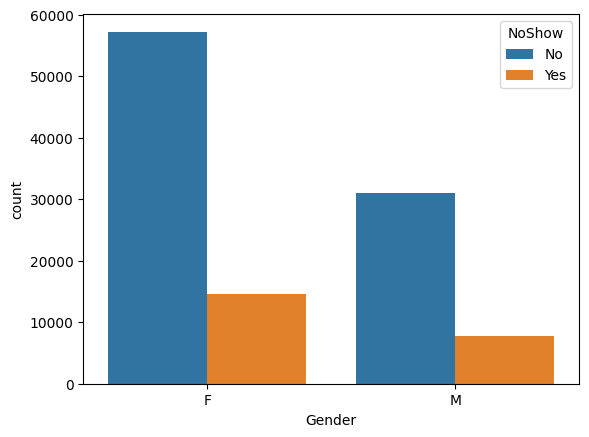

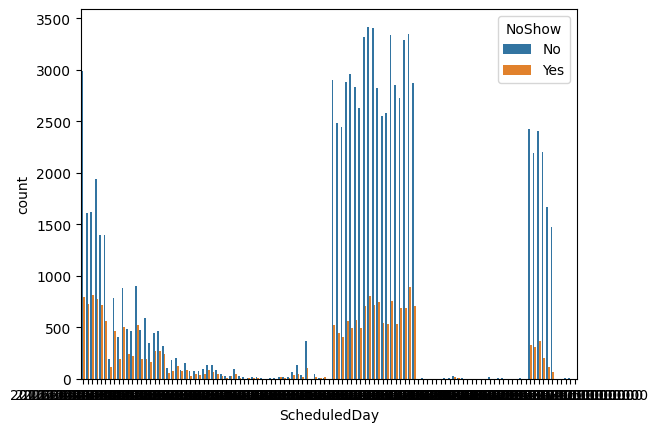

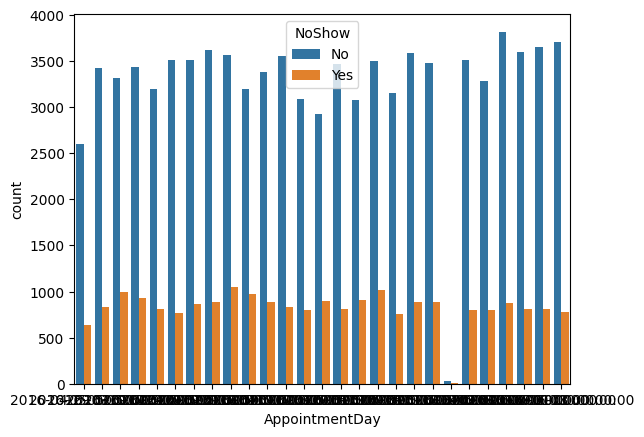

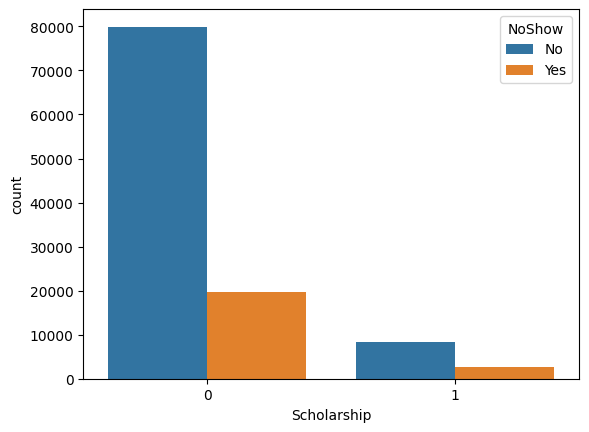

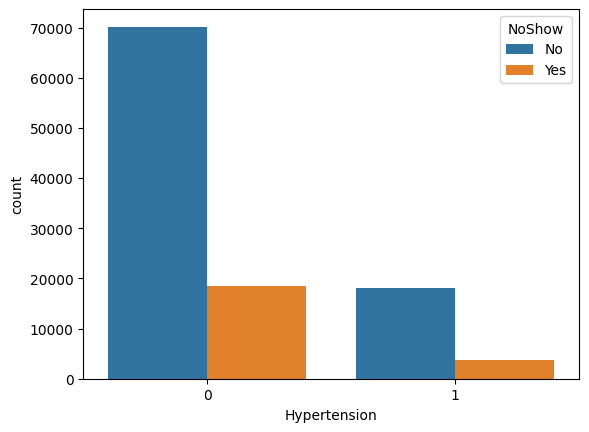

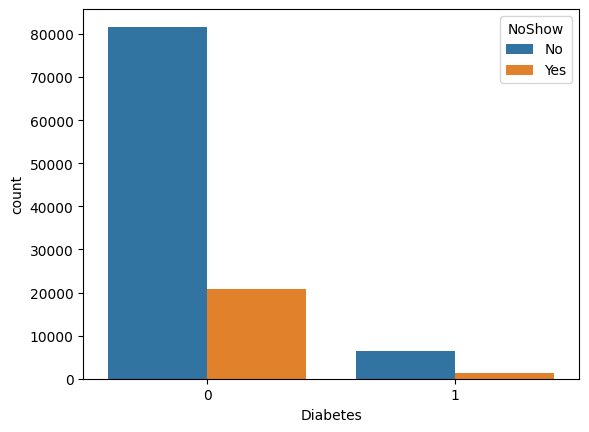

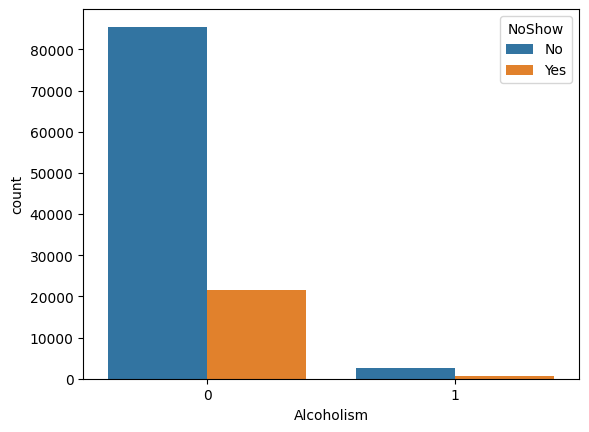

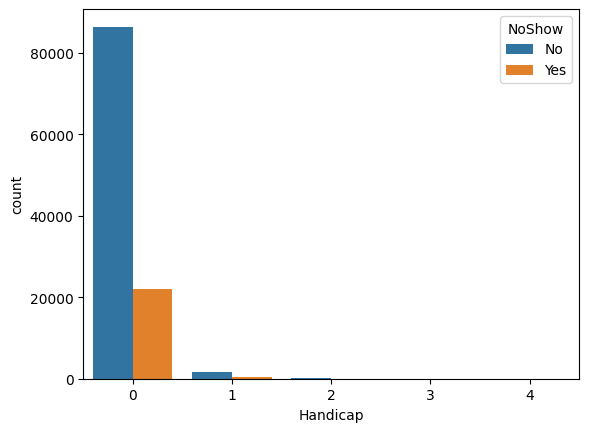

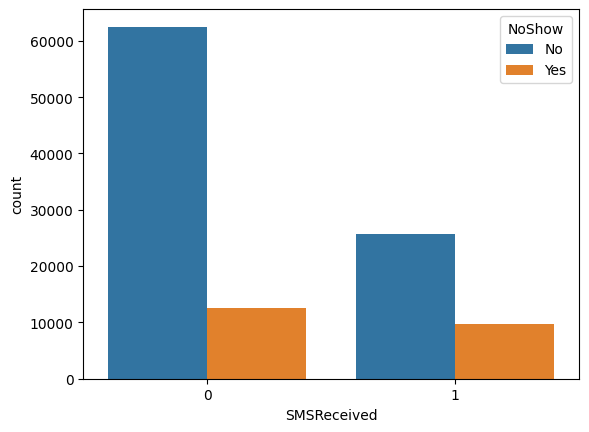

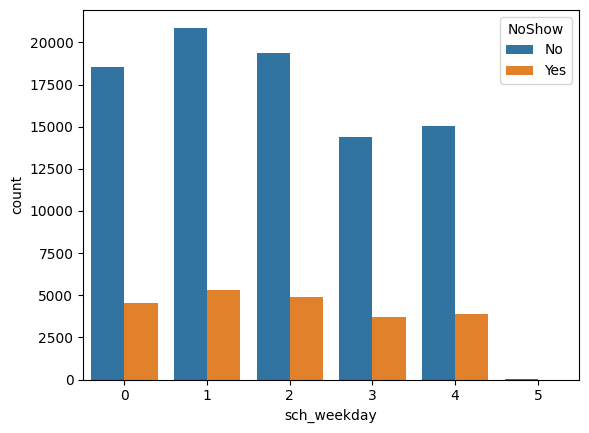

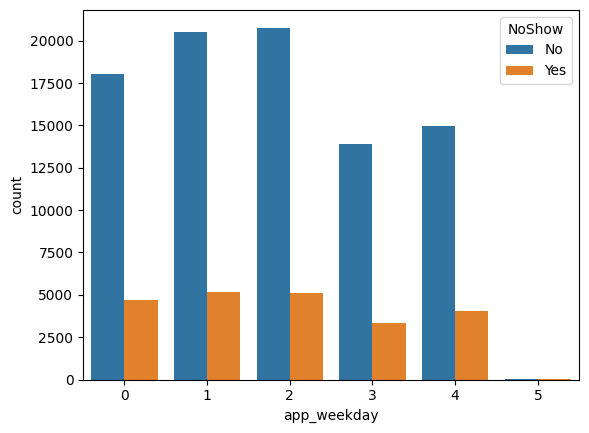

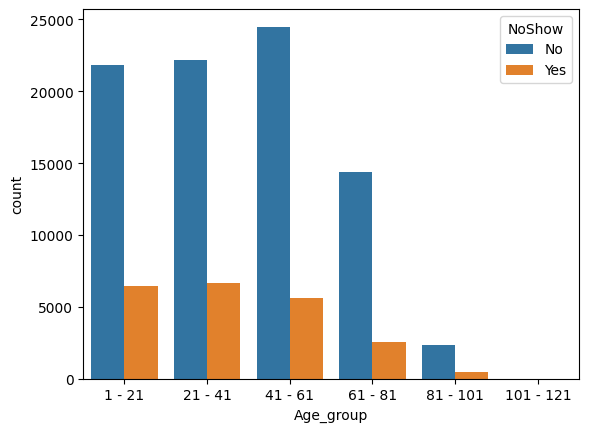

In [39]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(dataset.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(dataset[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=dataset, x=predictor, hue='NoShow')

In [40]:
dataset['NoShow'] = np.where(dataset.NoShow == 'Yes', 1, 0)

In [41]:
dataset.NoShow.value_counts()

NoShow
0    88208
1    22319
Name: count, dtype: int64

Convert all the categorical variables into dummy variables

In [42]:
dataset_dummies = pd.get_dummies(dataset)
dataset_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


Build a corelation of all predictors with 'NoShow'

<Axes: >

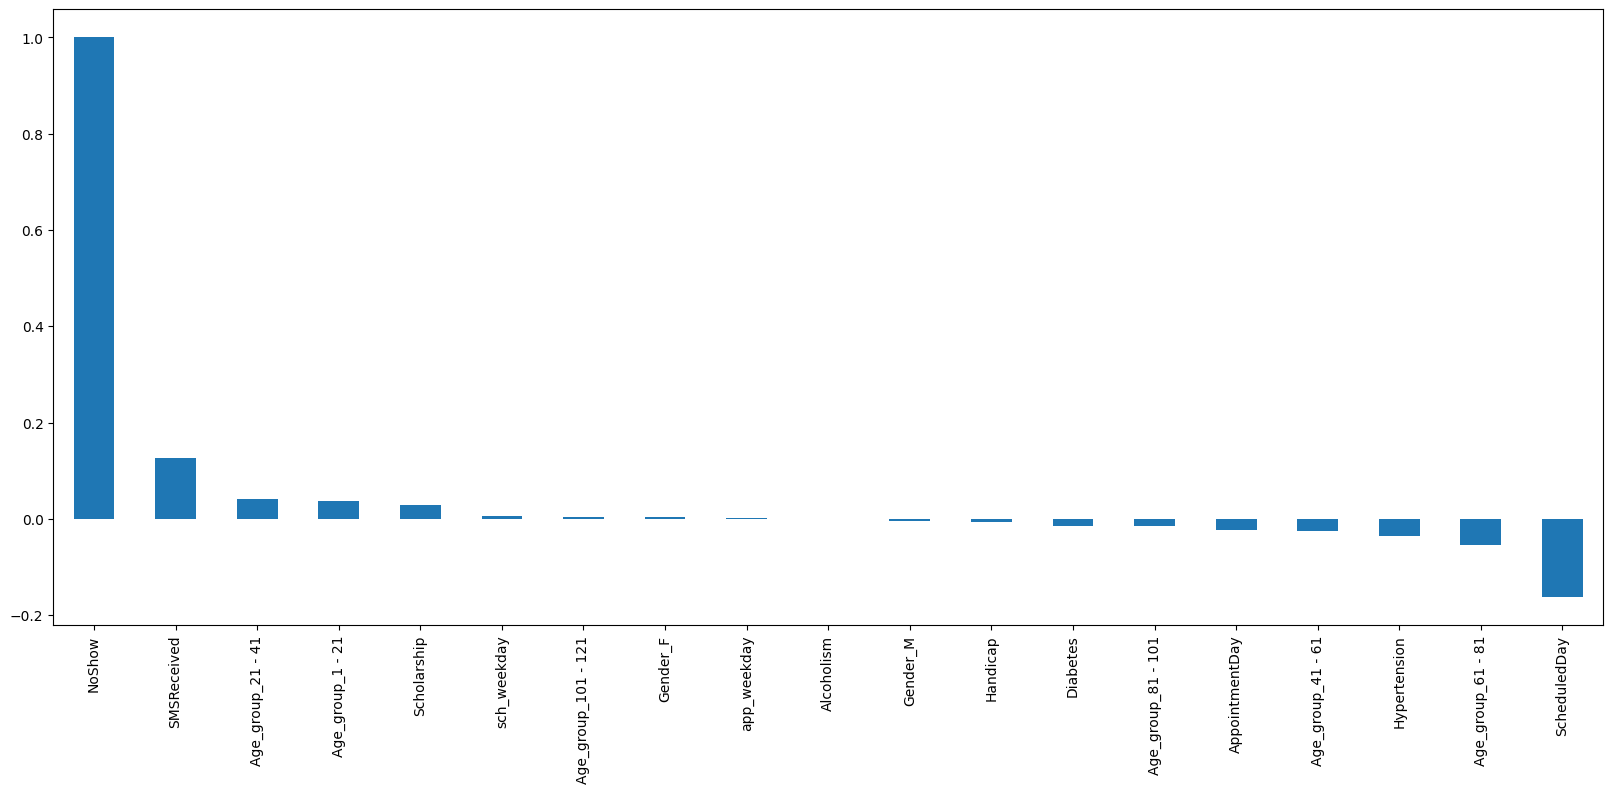

In [43]:
plt.figure(figsize=(20, 8))
dataset_dummies.corr()['NoShow'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

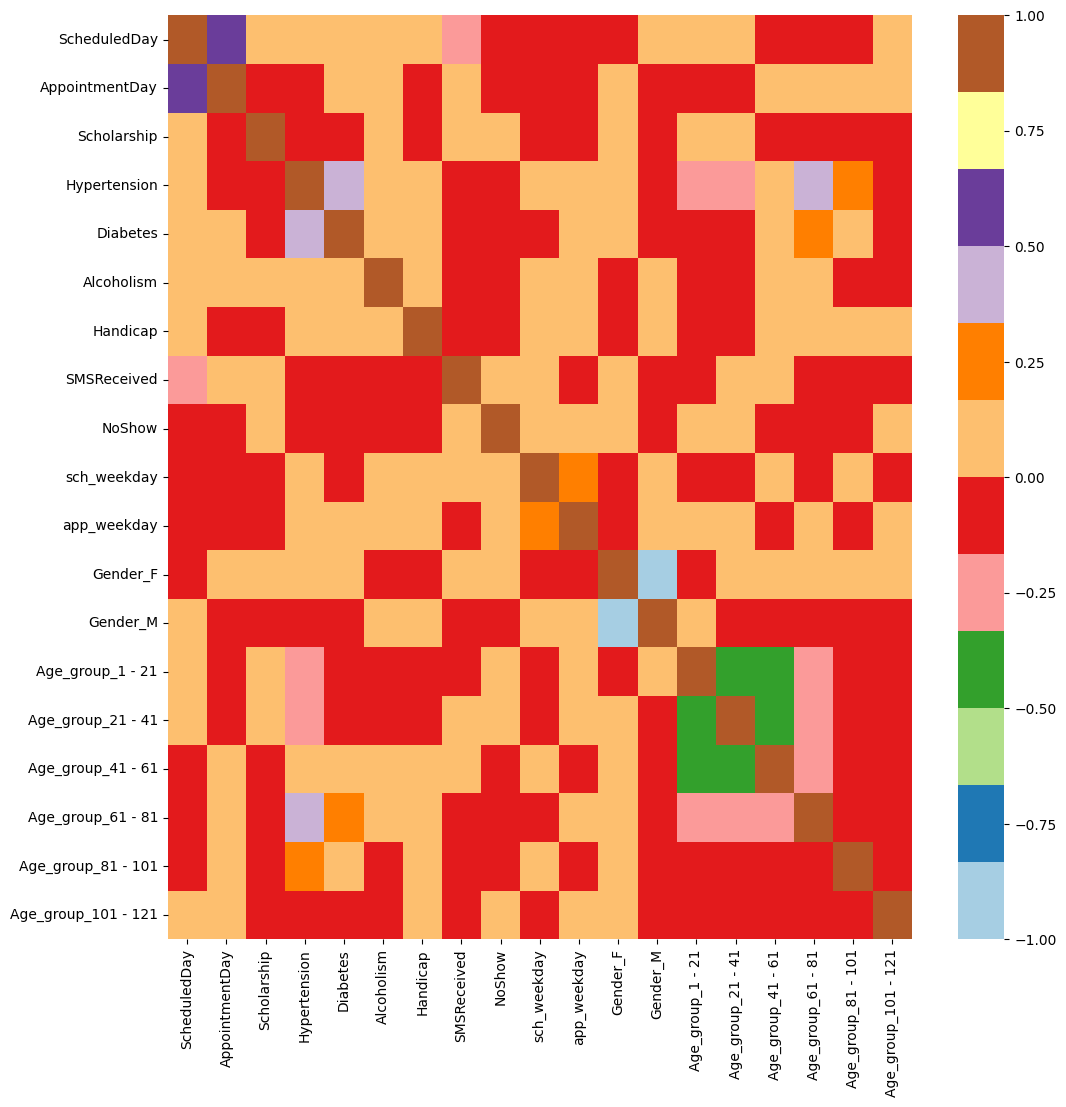

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset_dummies.corr(), cmap='Paired')

Bivariate Analysis

In [47]:
new_df1_target0=dataset.loc[dataset["NoShow"]==0]
new_df1_target1=dataset.loc[dataset["NoShow"]==1]

In [48]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

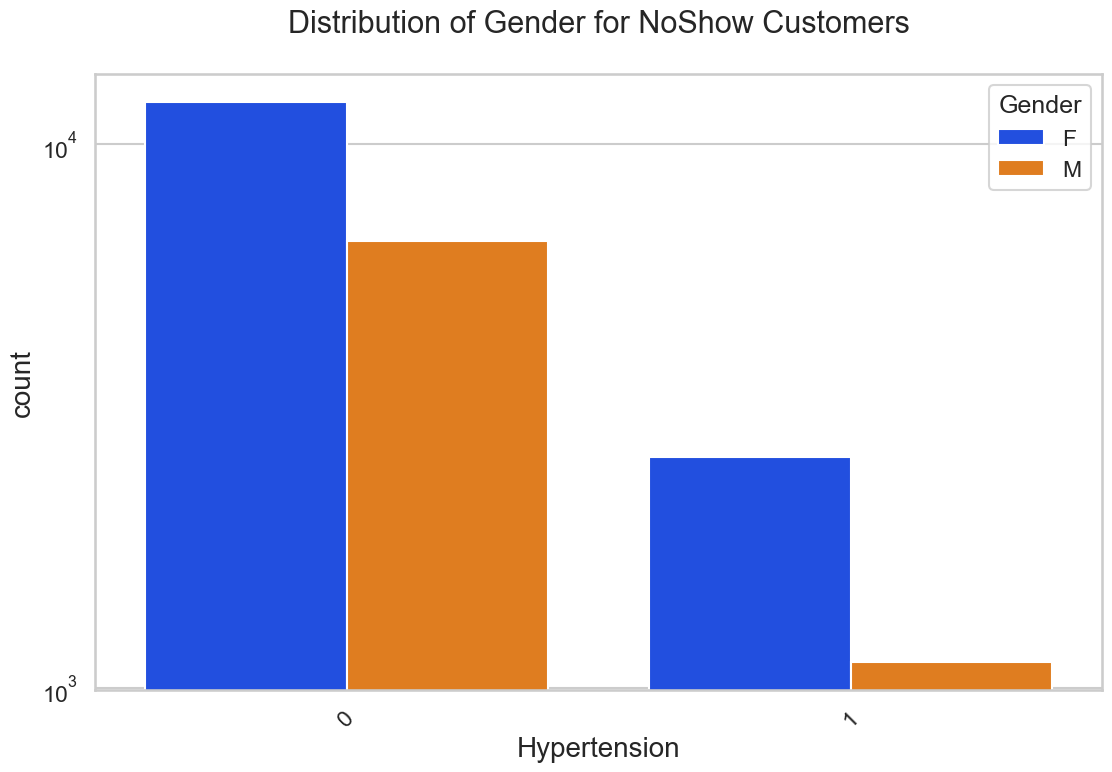

In [49]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

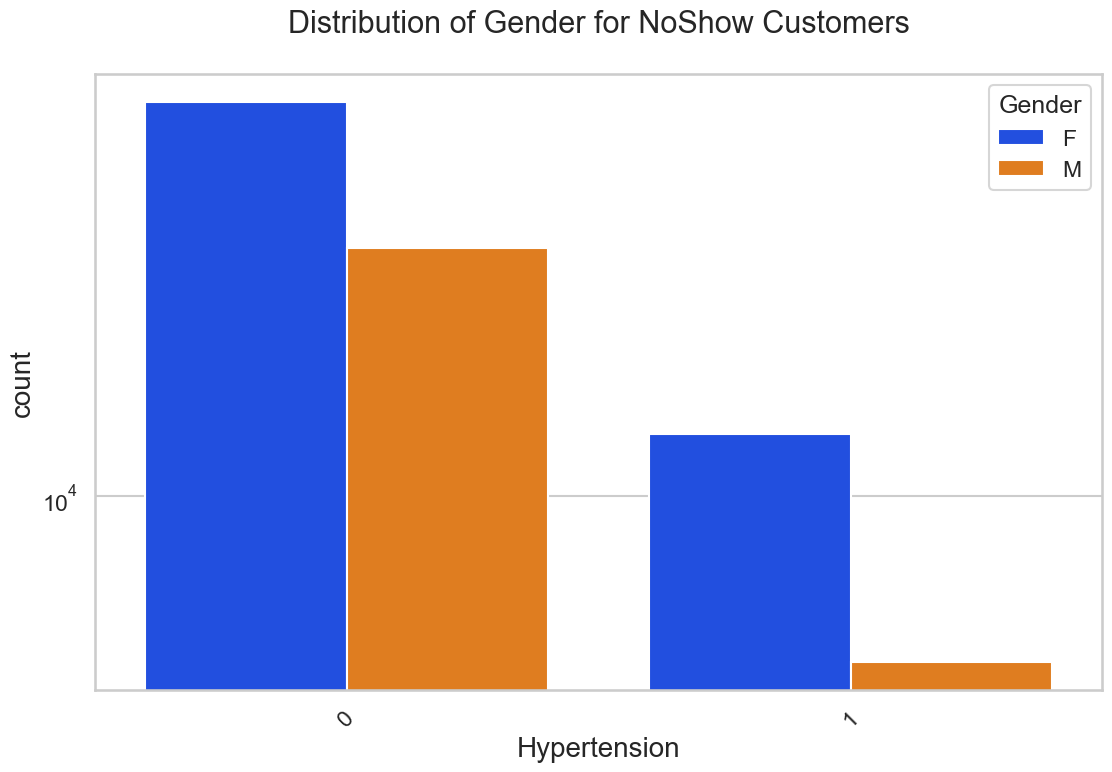

In [50]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

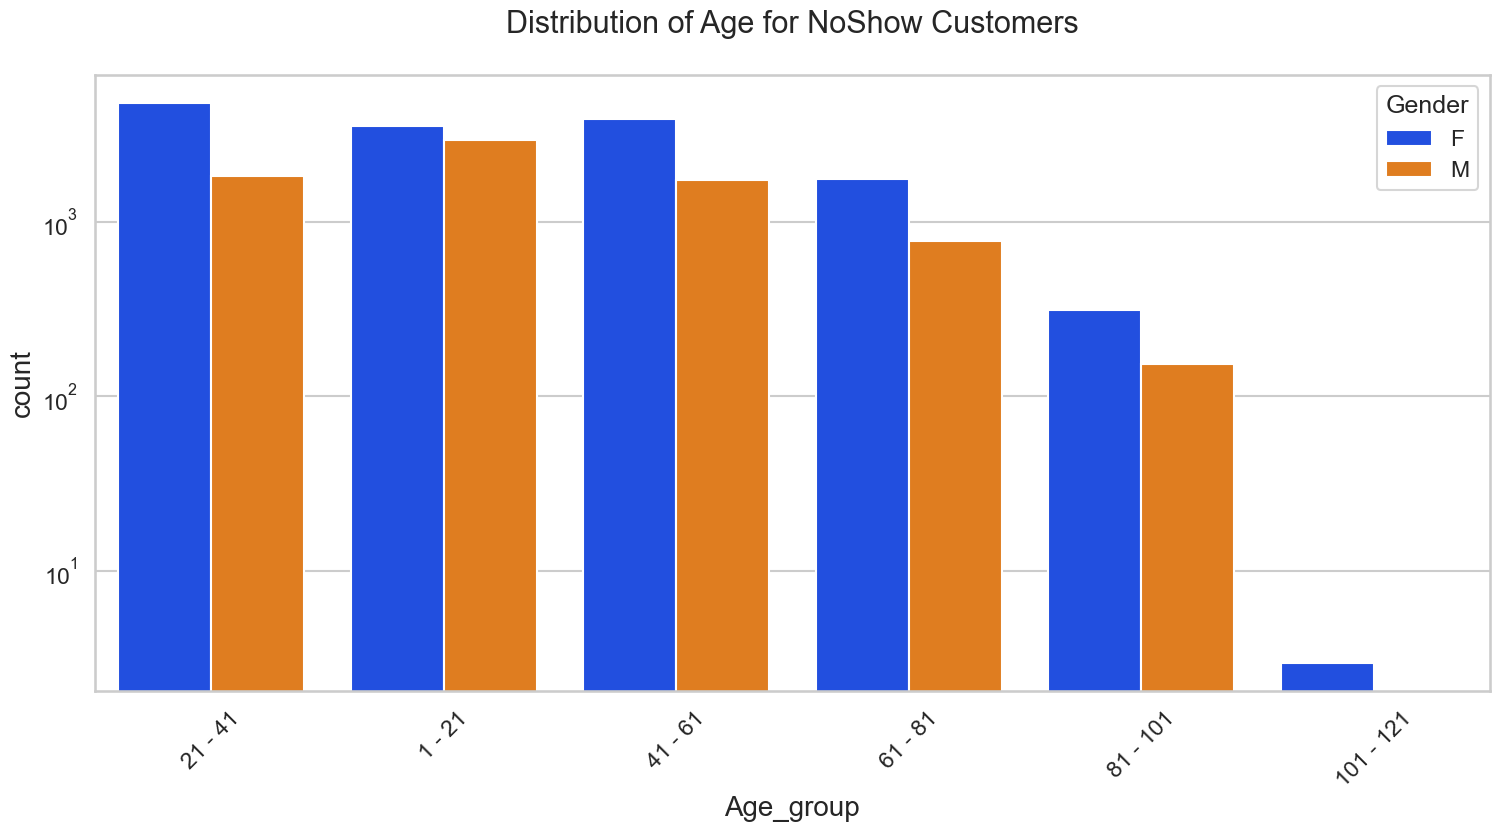

In [51]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

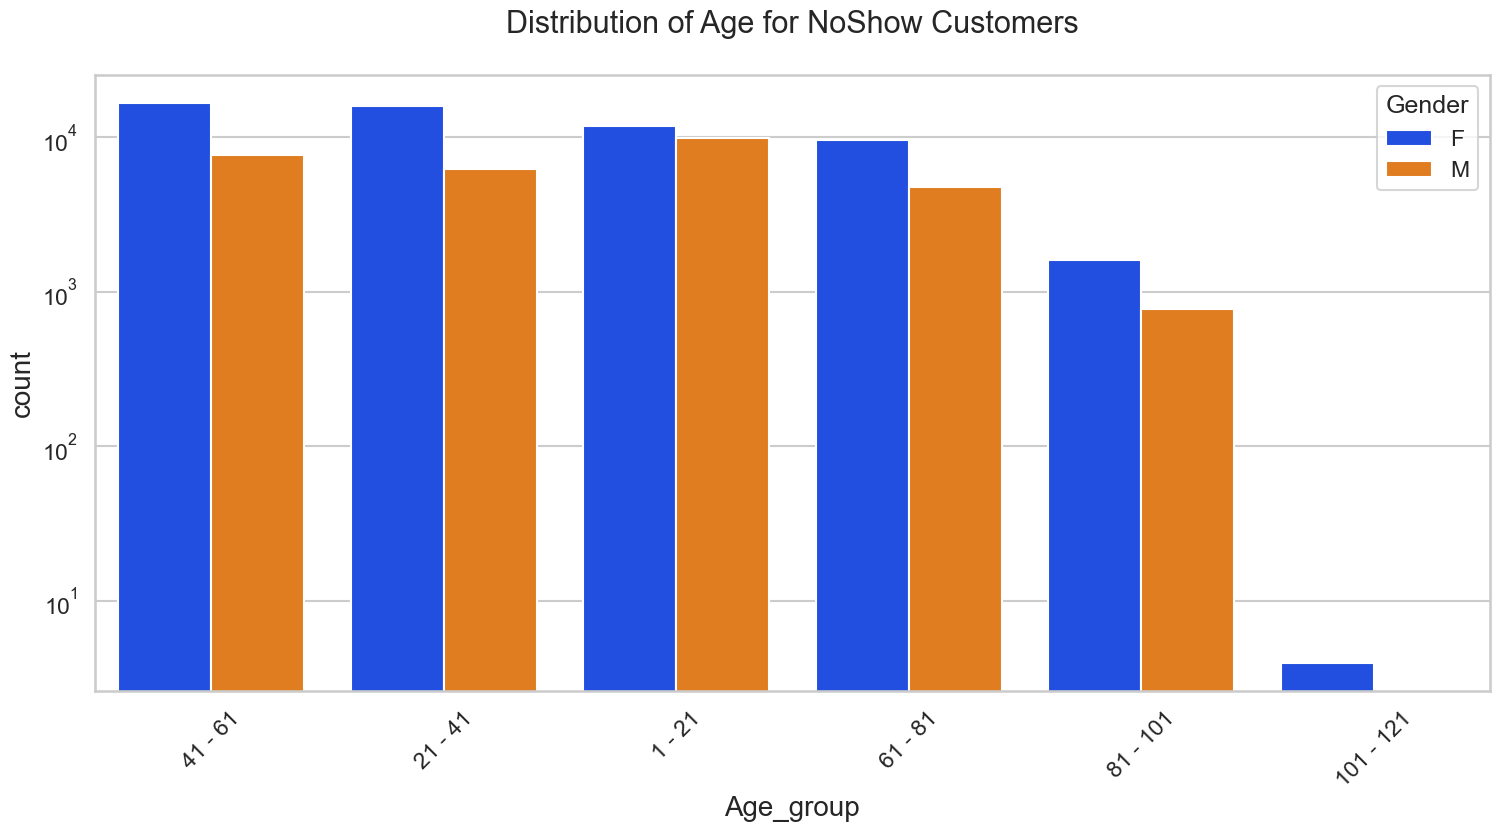

In [53]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

FINDINGS